# Author: Shreya Nagar


# Task 1: Prediction using Supervised ML


-In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

-What will be predicted score if a student studies for 9.25 hrs/ day?

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading data into a dataframe and summarizing data**

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
print(df.head())
print("\n\n")
print(df.info())
print("\n\n")
print(df.describe())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None



           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


**Checking for Linear Regression assumptions:**
        
    1)Linearity     2)Multivariate Normality     3)Mean of residuals     4)Homoscedasticity     

**1) Linearity:** Linear regression needs the relationship between the independent and dependent variables to be linear.

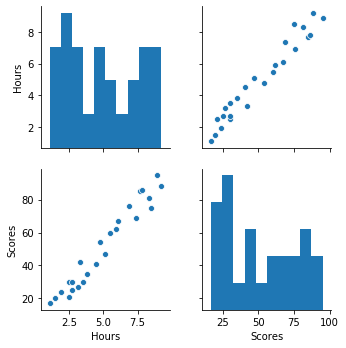

In [3]:
# pair plot is used to check the relation of independent variables with the dependent variable.
import seaborn as sns

sns.pairplot(df)

Positive correlation can be seen in plot, satisfies 1st assumption

**Rest of the assumptions requires to perform the regression before we can even check for them.**

**Preparing Data**

Splitting data into train and test set

In [4]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

**Training the algorithm**

In [5]:
slr= LinearRegression()
slr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Predictions**

In [6]:
predictions=slr.predict(xtest)
print(xtest.shape)
print(predictions)

(8, 1)
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


**Evaluating the model**

In [7]:
acc=slr.score(xtest,ytest)
print("Accuracy= "+str(acc*100)+"%")

from sklearn import metrics  
from math import sqrt
print('Root Mean Squared Error=', 
      sqrt(metrics.mean_squared_error(predictions, ytest)))

Accuracy= 95.68211104435257%
Root Mean Squared Error= 4.792191274636315


**2)Multivariate Normality:** Residuals are the differences between the true value and the predicted values.Residual terms should be normally distributed.

[-2.94633459  6.69422878  5.80620886 -3.1577679  -1.87664117  4.56736879
 -3.03090791 -7.27836446]


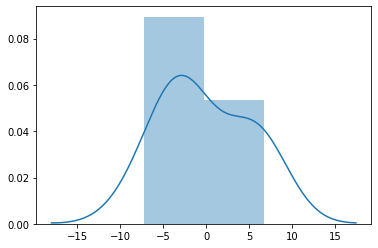

In [8]:
residuals=predictions-ytest
print(residuals)
sns.distplot(residuals,kde=True)

The residual terms are pretty much normally distributed, satisfies 2nd assumption.

**3)Mean of residuals:** One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [9]:
print(np.mean(residuals))

-0.1527761989746721


Mean of the residuals is near to zero, satisfies 3rd assupmtion.

**4)Homoscedasticity:** means that the residuals have equal or almost equal variance across the regression line.

**Detecting homooscedasticity by Graphical Method:** Plot the error terms against the predicted values. If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then homoscedasticity is absent.

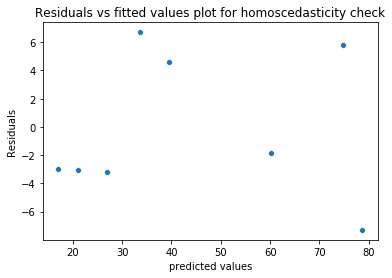

In [10]:
p = sns.scatterplot(predictions,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

There is no definite pattern, satisfies 4th assumption.

**Our data satisfies all the assumptions of Linear regression**

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [11]:
hrs=[[9.25]]
scr=slr.predict(hrs)
print("predicted score of a student studying for 9.25 hrs/ day= "+str(scr))

predicted score of a student studying for 9.25 hrs/ day= [92.91505723]
